# Cycle-GAN DEMO

## Basic Requirements
***
### model files in '/cycle_demo'
- cycle_gan.py
- dataloader.py
- networks.py
- opt.py

### datasets folders in './dataset/'
- "photo": images/photos to be transfered 
- "style": style to transfer

### Others
- numpy
- matplotlib
- PyTorch

### Model Checkpoints:
Networks and Loss will be saved every 10 epochs in the folder "saved_model_photo_style"

***

# Demonstration of trained model
## Preparation

In [1]:
import cycle_demo as demo
import torch

## Train model with dataset
This demo load the landscape dataset and Picasso in the dataset folder then train the model 100 epochs. The trained model is saved in './saved_models' folder.

In [3]:
demo.training_model(model_path= './saved_models', dataset_path = './dataset', photo = 'landscape', style = 'picasso')

dataset size = 1
The number of training images = 1
The number of style images = 1
cuda
End of epoch 1 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 2 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 3 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 4 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 5 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 6 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 7 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 8 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 9 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 10 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 11 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 12 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 13 / 100 	 Time Taken: 0 sec
learning rate = 0.0002000
End of epoch 14 / 100 	 Time Taken: 0 

## Load the trained model
It takes 30 mins to train the model with large size landscape dataset and style dataset. Here we provide a pre-trained model to demonstrate the result. The full-size dataset could be download from https://drive.google.com/drive/folders/1hQAO-faOqShCH0dV84Iwh0du2NoJFRDc?usp=sharing.

In [4]:
model = demo.load_trained_model(epo = 100)  # load the trained model
dataset_loader = demo.load_dataset(dataset_path = './dataset', photo = 'landscape', style = 'picasso') # load dataset

Loading photo =  landscape and style =  picasso
loading the model from ./saved_models_landscape_picasso/100_net_GenA.pth
loading the model from ./saved_models_landscape_picasso/100_net_GenB.pth
loading the model from ./saved_models_landscape_picasso/100_net_DisA.pth
loading the model from ./saved_models_landscape_picasso/100_net_DisB.pth


## Translate the forest photo into Picasso's style

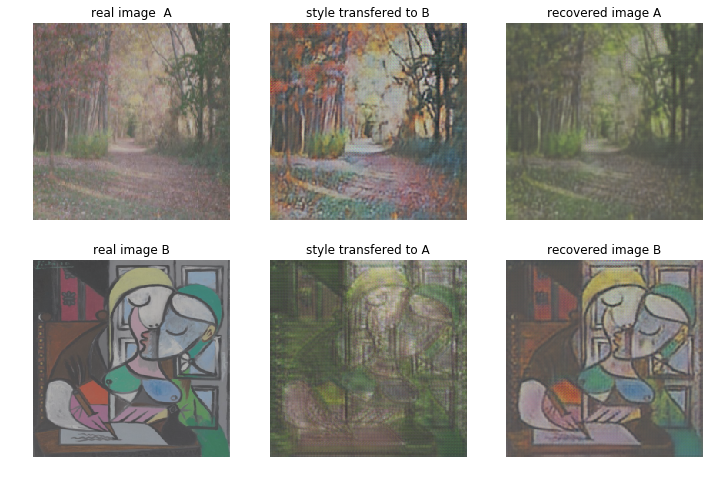

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)
# style translation
for i, (real_A, real_B) in enumerate(dataset_loader):
    model.set_input(real_A.to(device), real_B.to(device))    
    model.test()           # run inference
    demo.plot_result(model) # show result

## Translate the sketch of ironman into colored comics

In [6]:
model = demo.load_trained_model(photo = 'ironman', style = 'sketch', epo = 50)
dataset_loader = demo.load_dataset(dataset_path = './dataset', photo = 'sketch', style = 'ironman')

Loading photo =  ironman and style =  sketch
loading the model from ./saved_models_ironman_sketch/50_net_GenA.pth
loading the model from ./saved_models_ironman_sketch/50_net_GenB.pth
loading the model from ./saved_models_ironman_sketch/50_net_DisA.pth
loading the model from ./saved_models_ironman_sketch/50_net_DisB.pth


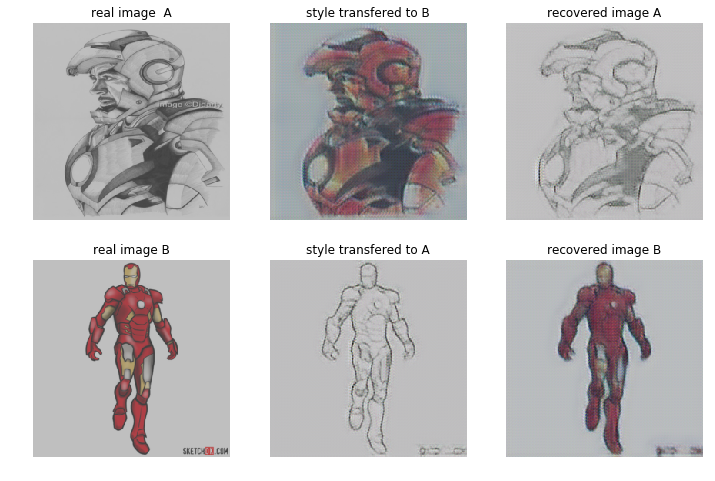

In [7]:
model.to(device)
for i, (real_A, real_B) in enumerate(dataset_loader):
    model.set_input(real_A.to(device), real_B.to(device))    
    model.test()           # run inference
    demo.plot_result(model)